In [1]:
import numpy as np
import pandas as pd

In [2]:
input = np.array([1,2,3])
weights = np.random.randn(3, 3) * 0.01
bias = np.zeros((1,3))

output=np.dot(input,weights)+bias
output

array([[-0.01989239, -0.00053432, -0.01040431]])

Activation function

In [3]:
class ReluAct:
    def __init__(self):
        pass
    def forward(self,inputs):
         self.output=np.maximum(0,inputs)
         return self.output

In [4]:
# input = np.array([1,2,3])
# weights = np.random.randn(3, 3) * 0.01
# bias = np.zeros((1,3))

# output=np.dot(input,weights)+bias
# print(output)
# output = ReLu(output)
# output

In [5]:
# input = np.array([[1,2,3],[3,4,5],[6,8,1]]) # 3x3
# weights = np.random.randn(3, 3) * 0.01 # 3x3
# bias = np.zeros((1,3))

# output=np.dot(input,weights)+bias
# print(output)
# output = ReLu(output)
# output

# Batch inputs

In [6]:
# input = np.array([[1,2,3],[3,4,5],[6,8,1]]) # 3x3
# weights = np.random.randn(3, 3) * 0.01 # 3x3
# bias = np.zeros((1,3))

# output=np.dot(input,weights)+bias
# print(output)
# output = ReLu(output)
# output

# Multiple Layers

In [7]:
# input = np.array([[1,2,3],[3,4,5],[6,8,1]]) # 3x3
# # Layer 1
# weights1 = np.random.randn(3, 3) * 0.01 # 3x3
# bias1 = np.zeros((1,3))

# # Layer 2
# weights2 = np.random.randn(3, 3) * 0.01 # 3x3
# bias2 = np.zeros((1,3))

# layer1=np.dot(input,weights1)+bias1
# layer1 = ReLu(layer1)
# print(layer1)

# layer2=np.dot(layer1,weights2)+bias2
# output = ReLu(layer2)

# print(output)


# Class of NN

In [8]:
class Dense:
    def __init__(self,inputs,neurons):
        self.weights=0.01*np.random.randn(inputs,neurons)
        self.bias=np.zeros((1,neurons))
    def forward(self,input):
        self.output = np.dot(input,self.weights)+self.bias
        return self.output


# Softmax

In [9]:
class Softmax:
    def __init__(self):
        pass
    def forward(self,input):
        max_row = np.max(input,axis=1,keepdims=True)
        normalize_row = input-max_row
        expo_max = np.sum(np.exp(normalize_row),axis=1,keepdims=True)
        expo_values = np.exp(normalize_row)/expo_max
        self.output = expo_values
        return self.output


        

# Cross Entropy Loss

In [10]:
class Cross_entropyLoss:
    def __init__(self):
        pass
    def forward(self, y_pred, y_true):
        y_pred_clipped = np.clip(y_pred, 1e-12, 1.0)
        sample_losses = -np.sum(y_true * np.log(y_pred_clipped), axis=1)
       
        self.output = np.mean(sample_losses)
        return self.output


In [11]:
y = np.array([
    [1, 0, 0],  # sample 1 → class 0
    [0, 1, 0],  # sample 2 → class 1
    [0, 0, 1]   # sample 3 → class 2
])


In [12]:
cs = Cross_entropyLoss()
cs.forward(output,y)

np.float64(27.631021115928547)

# Dense Layer with Activation, Softmax, Loss function

In [13]:
input = np.array([[1,2,3],[3,4,5],[6,8,1]]) # 3x3
# Layer 1
weights1 = np.random.randn(3, 3) * 0.01 # 3x3
bias1 = np.zeros((1,3))

# Layer 2
weights2 = np.random.randn(3, 3) * 0.01 # 3x3
bias2 = np.zeros((1,3))

layer1=np.dot(input,weights1)+bias1
# layer1 = ReLu(layer1)


actSoft = Softmax()
actSoft.forward(layer1)

lossFun = Cross_entropyLoss()
lossFun.forward(actSoft.output,[[1,0,0],[0,1,0],[1,0,0]])



print(lossFun.output)


1.115180116019325


In [14]:
import numpy as np

def ReluAct(x):
    return np.maximum(0, x)

def derivativeRelu(x):
    return (x > 0).astype(float)

inputs = np.array([10.0, 20.0, 30.0, 40.0])   
weights = np.random.randn(3, 4)              
biases = np.zeros(3)                        
target = 5.0
lr = 0.001


dy_da = np.ones(3)

for it in range(100):

    z = weights.dot(inputs) + biases        
    a = ReluAct(z)                        
    y = a.sum()                           
    loss = (y - target)**2

    dL_dy = 2.0 * (y)             

    da_dz = derivativeRelu(z)              
    dL_da = dL_dy * dy_da                  
    dL_dz = dL_da * da_dz                 

    dL_dW = dL_dz[:, np.newaxis] * inputs[np.newaxis, :]   

    dL_db = dL_dz.copy()                  

    weights -= lr * dL_dW
    biases  -= lr * dL_db

    if it % 10 == 0:
        print(f"iter {it:03d}  loss {loss:.6f}  y {y:.4f}")


iter 000  loss 15203.780682  y 128.3036
iter 010  loss 25.000000  y 0.0000
iter 020  loss 25.000000  y 0.0000
iter 030  loss 25.000000  y 0.0000
iter 040  loss 25.000000  y 0.0000
iter 050  loss 25.000000  y 0.0000
iter 060  loss 25.000000  y 0.0000
iter 070  loss 25.000000  y 0.0000
iter 080  loss 25.000000  y 0.0000
iter 090  loss 25.000000  y 0.0000


# Dense Layer + Backward 

In [15]:
class ReluAct:
    def forward(self, x):
        self.input = x
        self.output = np.maximum(0, x)
        return self.output
    
    def backward(self, dL_dout):
        dL_dinput = dL_dout * (self.input > 0).astype(float)
        return dL_dinput


In [16]:
class CrossEntropyLoss:
    def forward(self, y_pred, y_true):
        # Convert integer labels to one-hot if needed
        if y_true.ndim == 2 and y_true.shape[1] != y_pred.shape[1]:
            raise ValueError("y_true shape does not match y_pred classes")
        if y_true.ndim == 1 or (y_true.ndim == 2 and y_true.shape[1] == 1):
            y_one_hot = np.zeros_like(y_pred)
            y_one_hot[np.arange(y_true.size), y_true.flatten()] = 1
            y_true = y_one_hot
        
        y_pred_clipped = np.clip(y_pred, 1e-12, 1.0)
        sample_losses = -np.sum(y_true * np.log(y_pred_clipped), axis=1)
        self.y_pred = y_pred
        self.y_true = y_true
        return np.mean(sample_losses)

    def backward(self):
        n_samples = self.y_true.shape[0]
        dL_dy = (self.y_pred - self.y_true) / n_samples
        return dL_dy




In [17]:
class Softmax:
    def forward(self, x):
        max_row = np.max(x, axis=1, keepdims=True)
        normalize_row = x - max_row
        expo = np.exp(normalize_row)
        self.output = expo / np.sum(expo, axis=1, keepdims=True)
        print('googd')
        return self.output
   

In [18]:
import numpy as np

class Dense:
    def __init__(self, input_dim, output_dim):
        self.weights = np.random.randn(output_dim, input_dim) * 0.01
        self.biases = np.zeros(output_dim)
    
    def forward(self, x):
        self.input = x           
        self.output = x @ self.weights.T + self.biases  
        return self.output

    def backward(self, dL_dout):
        self.dweights = dL_dout.T @ self.input  
        self.dbias = np.sum(dL_dout, axis=0) 
        dL_dinput = dL_dout @ self.weights  
        
        return dL_dinput


In [19]:
class SGDoptimizer:
    def __init__(self,learning_rate=0.1):
        self.lr=learning_rate
    def forward(self,layer,):
        layer.weights = layer.weights - self.lr*layer.dweights 
        layer.biases = layer.biases - self.lr*layer.dbias 

In [20]:
import nnfs.datasets


X,y = nnfs.datasets.vertical_data(samples=10000,classes=2)
x_train = X[:,0:8000]
y_train = X[:,0:8000]
x_test = X[:,8000:10000]
y_test = X[:,8000:10000]

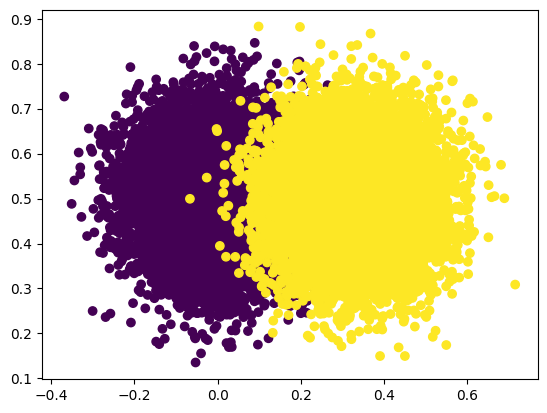

In [21]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)

In [22]:

# # inputs = np.array([[10.0, 20.0, 30.0, 40.0]]) 
# # target = np.array([[1.0, 0.0, 0.0]])           
# lr = 0.001

# dense = Dense(input_dim=2, output_dim=3)
# relu = ReluAct()
# softmax = Softmax()
# loss_func = CrossEntropyLoss()
# SGD = SGDoptimizer()
# # Training loop

# # Forward pass
# z = dense.forward(X)           # (1, 3)
# a = relu.forward(z)   
# y_pred = softmax.forward(a) # Output 200x3
# loss = loss_func.forward(y_pred, y) # y=200x1
# loss

In [23]:
def accuracy(y_pred, y_true):
    # y_pred: (samples, classes)
    # y_true: (samples,) integers
    y_pred_classes = np.argmax(y_pred, axis=1)
    return np.mean(y_pred_classes == y_true)


In [24]:
         
lr = 0.001

dense = Dense(input_dim=2, output_dim=3)
relu = ReluAct()
softmax = Softmax()
loss_func = CrossEntropyLoss()
SGD = SGDoptimizer()
# Training loop
for it in range(10000):
    # Forward pass
    z = dense.forward(x_train)           # (1, 3)
    a = relu.forward(z)                 # (1, 3)
    y_pred = softmax.forward(a)         # (1, 3) - no transpose!
    loss = loss_func.forward(y_pred, y_train)
    
    # Backward pass - combined softmax + cross-entropy gradient
    dL = loss_func.backward()           # (1, 3)
    dL = relu.backward(dL)              # (1, 3)
    dL = dense.backward(dL)             # (1, 4)
    SGD.forward(dense)


    if it % 10 == 0:
        acc = accuracy(y_pred, y_train.flatten())
        print(f"iter {it:05d}  loss {loss:.6f}  acc {acc:.4f}")


googd


ValueError: y_true shape does not match y_pred classes

In [ ]:

# Training loop
for it in range(x_test.shape[0]):
    
    z = dense.forward(x_test[it])           # (1, 3)
    a = relu.forward(z)                 # (1, 3)
    y_pred = softmax.forward(a)         # (1, 3) - no transpose!
    loss = loss_func.forward(y_pred, y[it])
    
    # Backward pass - combined softmax + cross-entropy gradient
    dL = loss_func.backward()           # (1, 3)
    dL = relu.backward(dL)              # (1, 3)
    dL = dense.backward(dL)             # (1, 4)
    SGD.forward(dense)


    if it % 10 == 0:
        print(f"iter {it:03d}  loss {loss:.6f}  y_pred {y_pred[0]}")
